In [169]:
import pandas as pd #Python data science library
import matplotlib.pyplot as plt #plotting library
plt.rc('font',size=20) #adjusting plots font size
import seaborn as sns #visualization library
import re #regular expression matching operations
import numpy as np #math library
from sklearn import tree #tree model module
from sklearn.metrics import accuracy_score #evaluative module
from sklearn.model_selection import train_test_split #train/test split module
from sklearn.linear_model import LogisticRegression #logistic regression module
from sklearn.model_selection import GridSearchCV #search over specified parameter values for an estimator
from sklearn.linear_model import Ridge #assumes only X's and Y centered, no cst term in regression with penalty
from sklearn.linear_model import Lasso #least absolute shrinkage and selection operator; variable selection and 
    #regularization to enhance prediction accuracy and interpretability 
from sklearn.tree import DecisionTreeClassifier #predicts model that predicts value of target variable by learning
    #simple decision rules from data features
from sklearn.preprocessing import MinMaxScaler #transforms features by scaling each to given range
scaler = MinMaxScaler()

%matplotlib inline
sns.set(style='whitegrid',palette='pastel',color_codes=True) #setting aesthetic for seaborn charts

In [170]:
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
       'total sulfur dioxide','density','pH','sulphates','alcohol'] #independent variables
df = pd.read_csv(r'C:\Users\t899037\data\winequality-red.csv',usecols=cols+['quality']) #dependent variable

#Adjusting column names for compatibility with design matrix (further down)
df['fixed_acidity'] = df['fixed acidity']
df['volatile_acidity'] = df['volatile acidity']
df['citric_acid'] = df['citric acid']
df['residual_sugar'] = df['residual sugar']
df['free_sulfur_dioxide'] = df['free sulfur dioxide']
df['total_sulfur_dioxide'] = df['total sulfur dioxide']
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,free_sulfur_dioxide,total_sulfur_dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.4,0.70,0.00,1.9,11.0,34.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,7.8,0.88,0.00,2.6,25.0,67.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7.8,0.76,0.04,2.3,15.0,54.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.2,0.28,0.56,1.9,17.0,60.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.4,0.70,0.00,1.9,11.0,34.0


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 18 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
dtypes: float64(17), int64(1)
memory usage: 224.9 KB


In [172]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,free_sulfur_dioxide,total_sulfur_dioxide
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,8.319637,0.527821,0.270976,2.538806,15.874922,46.467792
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,1.741096,0.179060,0.194801,1.409928,10.460157,32.895324
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,4.600000,0.120000,0.000000,0.900000,1.000000,6.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,7.100000,0.390000,0.090000,1.900000,7.000000,22.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,7.900000,0.520000,0.260000,2.200000,14.000000,38.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,9.200000,0.640000,0.420000,2.600000,21.000000,62.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,15.900000,1.580000,1.000000,15.500000,72.000000,289.000000


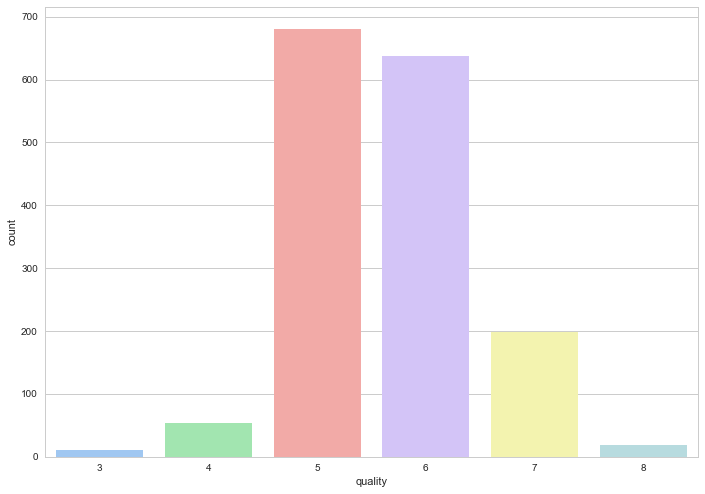

In [173]:
a4_dims = (11.7,8.27)
fig,ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax,x='quality',data=df);

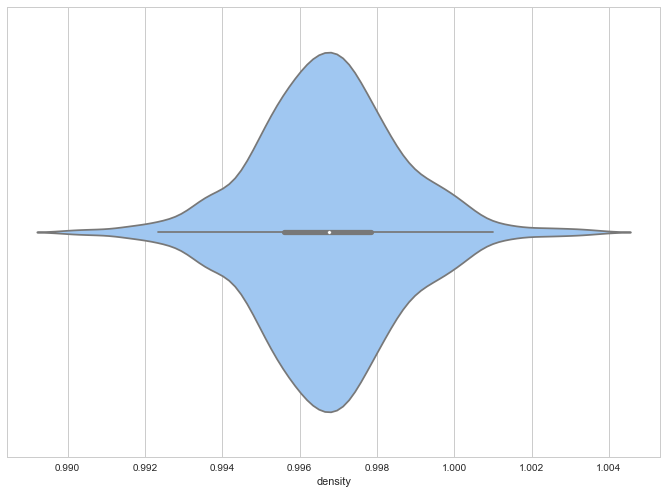

In [174]:
a4_dims = (11.7,8.27)
fig,ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax,x='density',data=df);

In [175]:
from sklearn.feature_selection import RFE #recursively considers increasingly smaller sets of features to
    #select features
    #estimator first trainined on initial feature set, importance of each obtained via coef or feature importances
    #least important trimmed from current set
    #repeated on refined set until desired numbers reached

In [220]:
from sklearn.svm import SVR #support vector regression is an extension of support vector classification
    #depends on subset of train data
lr = LogisticRegression()

rfe = RFE(lr,3) #using logistic regression to select only 3 features
rfe = rfe.fit(df[cols],df['quality']) #x is 'cols', y is 'quality'
print('Feautres sorted by their rank:')
print(sorted(zip(map(lambda x: round(x,4),rfe.ranking_),df[cols])))

#estimator = SVR(kernel='linear')
#selector = RFE(estimator,5,step=1)
#selector = selector.fit(X,y)
#print(selector.ranking_)


Feautres sorted by their rank:
[(1, 'chlorides'), (1, 'sulphates'), (1, 'volatile acidity'), (2, 'density'), (3, 'pH'), (4, 'citric acid'), (5, 'alcohol'), (6, 'fixed acidity'), (7, 'residual sugar'), (8, 'free sulfur dioxide'), (9, 'total sulfur dioxide')]


In [222]:
import statsmodels.api as sm
from patsy import dmatrices

y,X = dmatrices('quality ~volatile_acidity+chlorides+sulphates', data = df, return_type = 'dataframe') #design matrix
    #explanatory matrix (X) of a set of objects
    #each row represents individual object
    #successive columns correspond to variables and specific values for object
    #1,0 used in analysis of variance
    #1 indicates statistical significance
X.head()

,Intercept,volatile_acidity,chlorides,sulphates
0,1.0,0.70,0.076,0.56
1,1.0,0.88,0.098,0.68
2,1.0,0.76,0.092,0.65
3,1.0,0.28,0.075,0.58
4,1.0,0.70,0.076,0.56


In [223]:
mod = sm.OLS(y,X) #defining ordinary least squares model
res = mod.fit() #results of fitting the OLS model
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     141.3
Date:                Fri, 19 Jan 2018   Prob (F-statistic):           3.59e-81
Time:                        11:18:36   Log-Likelihood:                -1738.2
No. Observations:                1599   AIC:                             3484.
Df Residuals:                    1595   BIC:                             3506.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.9219      0.103  

In [224]:
print('Parameters: \n', res.params,'\n')
print('Standard errors: \n', res.bse,'\n')
print('Predicted values: \n', res.predict(),'\n')

Parameters: 
 Intercept           5.921907
volatile_acidity   -1.419511
chlorides          -3.432044
sulphates           1.160150
dtype: float64 

Standard errors: 
 Intercept           0.103234
volatile_acidity    0.105639
chlorides           0.417838
sulphates           0.119956
dtype: float64 

Predicted values: 
 [ 5.31709821  5.12529935  5.28142838 ...,  5.80723372  5.57262584
  6.01761072] 



In [225]:
#assessing multicollinearity via condition number
#condition numbers > 20 raise concern
norm_x = X.values #normalizing x values
for i, name in enumerate(X):
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T,norm_x)

eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max()/eigs.min()) #square root of ratio of biggest to smallest eigenvalues
print('Condition number: ',condition_number)

Condition number:  14.0162949837


In [226]:
#can also look at formal stats (ie: DFBETA)
    #DFBETA measures the difference in each parameter estimate with(out) the influential point
    #there is a DFBETA for each data pt 
    #large DFBETA indicates observations influential in estimating given parameter 
infl = res.get_influence() 
2./len(X)**0.5 #2 divided by the square root of n is the size-adjusted cutoff to indicate influential observations

0.050015632328035534

In [212]:
print(infl.summary_frame().filter(regex='dfb')) #anything with abs value > 0.05 considered influential

C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))


      dfb_fixed acidity  dfb_volatile acidity  dfb_citric acid  \
0            -86.832491            194.869325        15.455790   
1            -85.846820            194.686608        15.498445   
2            -86.318845            194.755302        15.539604   
3            -81.466232            194.588982        15.467241   
4            -86.832491            194.869325        15.455790   
5            -87.366571            194.891458        15.476498   
6            -86.998072            194.923052        15.498411   
7            -82.337382            195.204274        14.824317   
8            -76.807036            194.327269        14.419177   
9            -80.564066            194.946215        15.311227   
10           -85.786355            194.896193        15.459578   
11           -80.564066            194.946215        15.311227   
12           -86.557078            194.919902        15.465272   
13           -66.871063            193.447353        15.040166   
14        

C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:352: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_external * np.sqrt(hii / (1 - hii))
